In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load historical stock price data 
data = pd.read_csv('SPP/GOOGLE.csv')

# Convert 'Date' to a numeric representation
data['Date'] = pd.to_datetime(data['Date'])
data['NumericDate'] = (data['Date'] - data['Date'].min()).dt.days

# Features and target
features = data[['NumericDate', 'Open', 'High', 'Low', 'Volume']]
target = data['Close']



In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build a RandomForestRegressor (you can explore other regression models)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

In [4]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.26


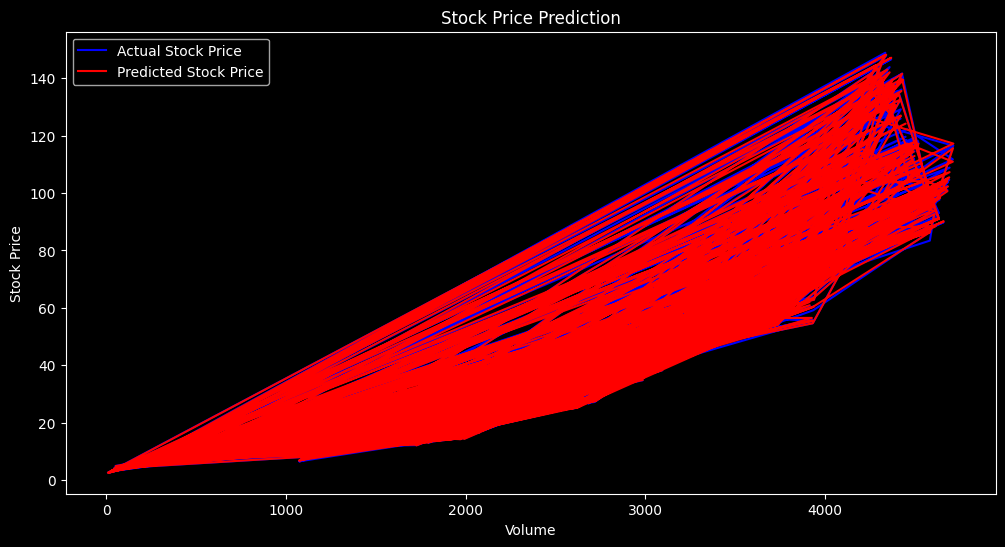

In [5]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Actual Stock Price', color='blue')
plt.plot(X_test.index, predictions, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Volume')
plt.ylabel('Stock Price')
plt.legend()
plt.show()